Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny Lagrange'a . Język implementacji do wyboru (Julia, C). Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji.

In [23]:
using Polynomials
using Plots

In [24]:
function l(k, X)
    x_k = X[k]
    X = [x for x in X if x != x_k]
    p = Poly([1.0])
    q = 1
    for x_i in X
        p = p * poly([x_i])
        q = q * (x_k - x_i)
    end
    return (p / q)
end

function L(X, Y)
    p = Poly([0])
    for k in 1:1:length(Y)
        p = p + (Y[k] * l(k, X))
    end
    return p
end

L (generic function with 1 method)

In [25]:
x = 1:1:10
y = [rand() for a in x]
xs = 1.0:0.05:10.0



1.0:0.05:10.0

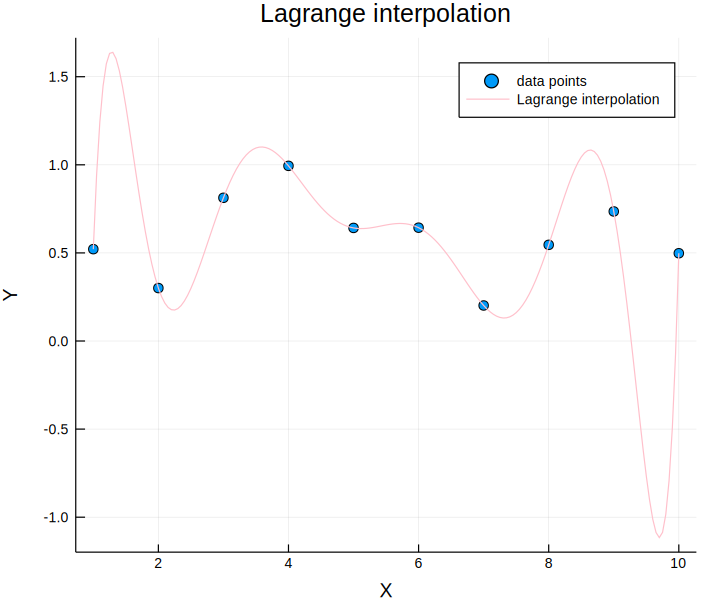

In [26]:
equL = L(x, y)

scatter(x, y, label = "data points")

plot!(xs, polyval(equL, xs),
    color=:pink,
    label = "Lagrange interpolation",
    xlabel = "X",
    ylabel = "Y",
    title = "Lagrange interpolation",
    dpi = 120,
    size = (600,500)
    )

Zrobic to samo dla metody Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Jezyk implementacji wybrac taki sam, jak w poprzednim punkcie. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie.

In [27]:
function comp_n(X, y_k, k, p_k)
    x_k = X[k]
    p = y_k - polyval(p_k, x_k)
    q = 1
    for i in 1:1:k-1
        q = q * (x_k - X[i])
    end
    return (p / q)
end

function N(X, Y, n)
    if n == 1
        Poly(float(Y[1]))
    else
        pp = N(X, Y, n-1)
        c = comp_n(X, Y[n], n, pp)
        poly([X[i] for i in 1:1:n-1]) * c + pp
    end
end

function N(X, Y)
    N(X, Y, length(Y))
end

N (generic function with 2 methods)

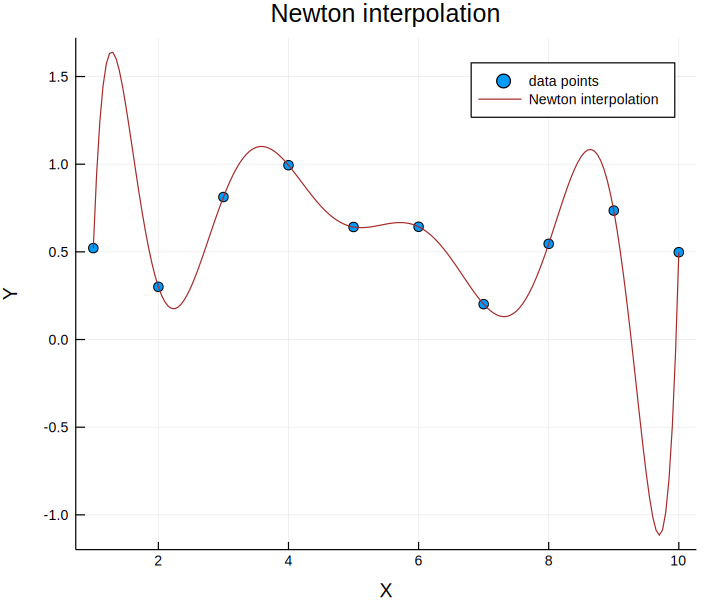

In [28]:
equN = N(x, y)

scatter(x, y,label = "data points")

plot!(xs, polyval(equN, xs),
    color=:brown,
    label = "Newton interpolation",
    xlabel = "X",
    ylabel = "Y",
    title = "Newton interpolation",
    dpi = 120,
    size = (600,500))

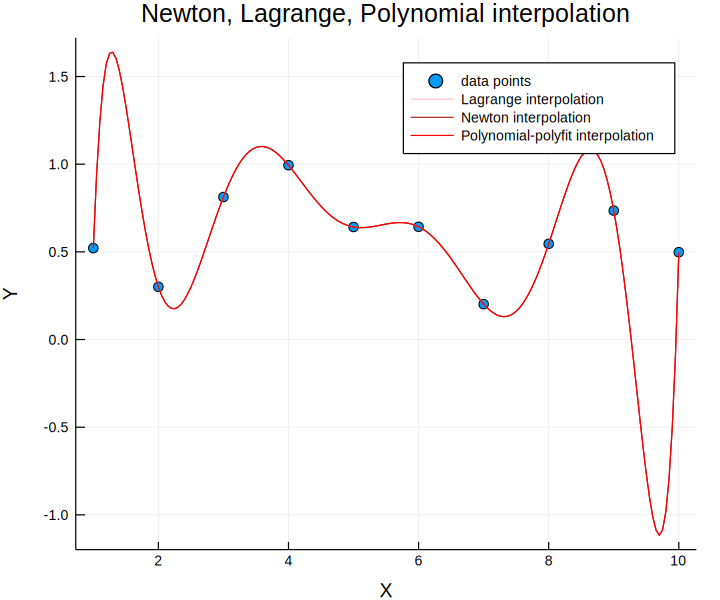

In [29]:
equP = polyfit(x, y)

scatter(x, y, label = "data points")

plot!(xs, polyval(equL, xs),
    color=:pink,
    label = "Lagrange interpolation",
)

plot!(xs, polyval(equN, xs),
    color=:brown,
    label = "Newton interpolation")

plot!(xs, polyval(equP, xs),
    color=:red,
    label = "Polynomial-polyfit interpolation",
    xlabel = "X",
    ylabel = "Y",
    title = "Newton, Lagrange, Polynomial interpolation",
    dpi = 120,
    size = (600,500))

Każdy z interpolujących wielomianów prechodzi przez te same punkty. Dzieje się tak, gdyż dla danych n+1 punktów istnieje dokładnie jeden wielomian n-tego stopnia, który przez nie przechodzi.

Porownać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Dokonac pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego.

In [30]:
using DataFrames
using Statistics

In [31]:
df = DataFrame(type=String[], size = Int64[], time = Float64[])
        
types=[];sizes=[];times=[]
range = 100:100:500
for rr in range
    xx = 0:1:rr
    for i in 1:1:10
        yy = rand(Int, rr+1)
        push!(df,["lagrange", rr, @elapsed L(xx,yy)])        
        push!(df, ["newton", rr, @elapsed N(xx,yy)])
        push!(df, ["polyfit", rr, @elapsed polyfit(xx,yy)])
    end
end
df

,type,size,time
,String,Int64,Float64
1,lagrange,100,0.0343558
2,newton,100,0.0353243
3,polyfit,100,0.106894
4,lagrange,100,0.0171624
5,newton,100,0.000580463
6,polyfit,100,0.00123177
7,lagrange,100,0.0118083
8,newton,100,0.00069707
9,polyfit,100,0.0112126


In [32]:
pol_res = by(df, [1,2]) do dff
    DataFrame(time_mean = mean(dff[3]), time_std = std(dff[3]))
end

,type,size,time_mean,time_std
,String,Int64,Float64,Float64
1,lagrange,100,0.0157108,0.00685016
2,newton,100,0.00406677,0.0109829
3,polyfit,100,0.0127353,0.0332387
4,lagrange,200,0.0727167,0.00187156
5,newton,200,0.00322522,0.000232609
6,polyfit,200,0.012335,0.0229662
7,lagrange,300,0.190995,0.00346223
8,newton,300,0.00680089,0.00135649
9,polyfit,300,0.00445641,0.0014059


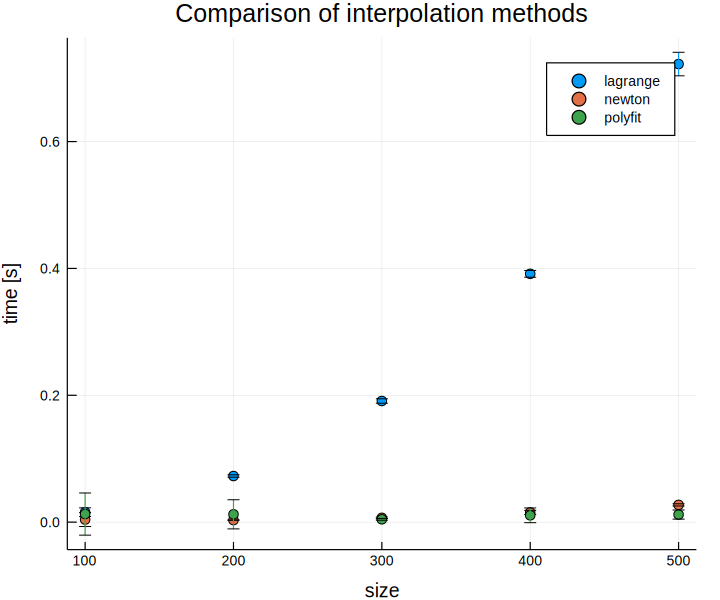

In [33]:
scatter(pol_res[:size], 
        pol_res[:time_mean], 
        group = pol_res[:type],
        yerr = pol_res[:time_std],
        xlabel = "size",
        ylabel = "time [s]",
        dpi = 120,
        size = (600,500),
        title = "Comparison of interpolation methods")

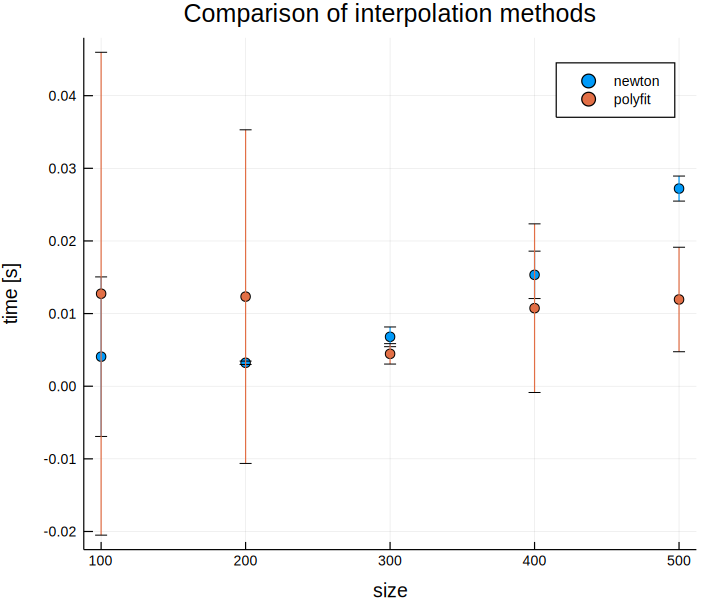

In [34]:
## dataframe without lagrange
pol_res_noL = pol_res[pol_res[:type].!= "lagrange", :]

scatter(pol_res_noL[:size], 
        pol_res_noL[:time_mean], 
        group = pol_res_noL[:type],
        yerr = pol_res_noL[:time_std],
        xlabel = "size",
        ylabel = "time [s]",
        dpi = 120,
        size = (600,500),
        title = "Comparison of interpolation methods")

Poeksperymentowac z interpolacją funkcjami sklejanymi (minimum dwie rozne funkcje sklejane), narysowac wykresy i porownac z wykresami interpolacji wielomianowej.

In [35]:
import Pkg
Pkg.add("Interpolations")
using Interpolations

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


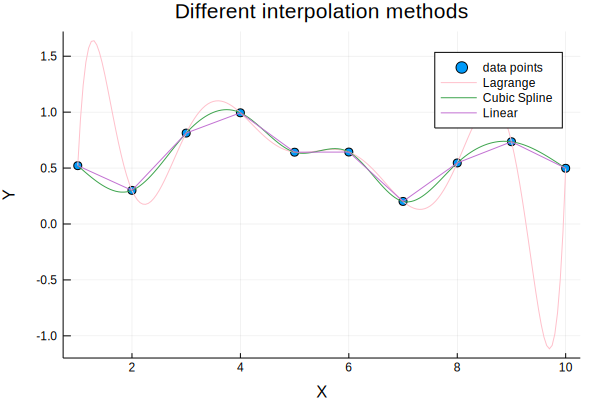

In [36]:
scatter(x, y, label = "data points")

 plot!(xs, polyval(equL, xs),
     color=:pink,
     label = "Lagrange")

plot!(xs, [CubicSplineInterpolation(x,y)(i) for i in xs],
        label = "Cubic Spline")

plot!(xs, [interpolate(y, BSpline(Linear()))(i) for i in xs],
        label = "Linear",
        xlabel = "X",
        ylabel = "Y",
        title = "Different interpolation methods")

Zademonstrowac efekt Rungego

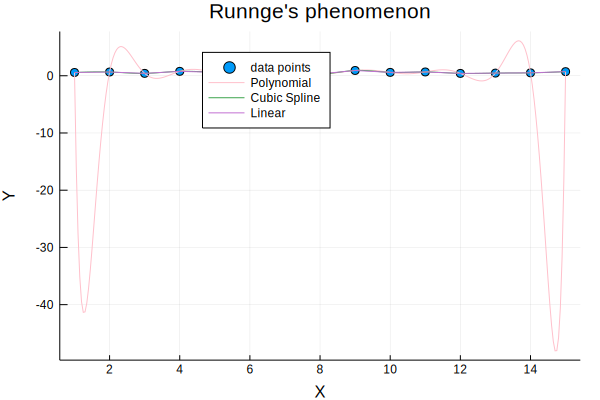

In [37]:
Rx = 1:1:15
Ry = [rand() for a in Rx]
Rxs = 1.0:0.05:15.0


scatter(Rx, Ry, label = "data points")

plot!(Rxs, polyval(polyfit(Rx,Ry), Rxs),
      color=:pink,
      label = "Polynomial")

plot!(Rxs, [CubicSplineInterpolation(Rx,Ry)(i) for i in Rxs],
      label = "Cubic Spline")

plot!(Rxs, [interpolate(Ry, BSpline(Linear()))(i) for i in Rxs],
      label = "Linear",
      legend = :top,
      xlabel = "X",
      ylabel = "Y",
      title = "Runnge's phenomenon")

Takie zachowanie się wielomianu interpolującego jest zjawiskiem typowym dla interpolacji za pomocą wielomianów wysokich stopni przy stałych odległościach węzłów. Występuje ono również, jeśli interpolowana funkcja jest nieciągła albo odbiega znacząco od funkcji gładkiej.

Ponieważ zgodnie z twierdzeniem Weierstrassa istnieje ciąg interpolujących wielomianów coraz wyższych stopni, które przybliżają jednostajnie funkcje ciągłą, można uważać to za paradoks, iż efekt Rungego ma dokładnie odwrotny wynik. Jest to spowodowane nałożeniem warunku na równoodległość węzłów.

Aby uniknąć tego efektu, stosuje się interpolację z węzłami coraz gęściej upakowanymi na krańcach przedziału interpolacji. Np. węzłami interpolacji n-punktowej wielomianowej powinny być miejsca zerowe wielomianu Czebyszewa n-tego stopnia.